# Introduction to Linear Regression: 2D and 3D Examples

In this notebook, we will explore **Linear Regression** with simple 2D data and then extend it to predict a plane using 3D data. We will use a combination of mathematical formulas and the **scikit-learn** library for regression, with clear examples to understand the principles of this fundamental technique in machine learning.

## Overview of Linear Regression

**Linear regression** is a statistical technique used to model the relationship between a **dependent variable** and one or more **independent variables**. Essentially, it fits a straight line (or plane, in the case of 3D data) that best explains the observed data. The line is represented by the formula:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Where:
- **y**: Dependent variable (the value we are predicting)
- **x**: Independent variable (input feature)
- **\beta_0**: Intercept (where the line crosses the y-axis)
- **\beta_1**: Slope (the rate at which y changes as x changes)
- **\epsilon**: Random error term (difference between the actual and predicted y)

The goal is to determine the values of \(eta_0\) and \(eta_1\) that minimize the difference between predicted and actual y values.

## Task A: Linear Regression with 2D Data

### Step 1: Generating Data
We generate random data points using **NumPy**. Specifically, the x-values are drawn from a normal distribution with a mean of 1.5 and a standard deviation of 2.5. An additional residual term (error) with a mean of 0 and standard deviation of 0.5 is added to introduce noise, making our data more realistic. Adding noise helps simulate real-world scenarios where data is rarely perfect and always contains some variability.

```python
x = np.random.normal(1.5, 2.5, 100)   # Generate x-values
res = np.random.normal(0, 0.5, 100)   # Generate residual errors
y = 2 + 0.3 * x + res                # Compute actual y-values
```

### Step 2: Linear Regression with scikit-learn
We use the **LinearRegression** model from **scikit-learn** to fit our data. The model finds the best-fit line for the given data by minimizing the sum of squared errors.

- **LinearRegression()**: This function initializes the linear regression model.
- **fit(X, y)**: Fits the model to the data. Here, `X` must be a 2D array, so we reshape `x` using `x.reshape(-1, 1)` to ensure compatibility.

```python
lm = LinearRegression()  # Initialize the model
model = lm.fit(x.reshape(-1, 1), y)  # Fit the model to the data
```

### Step 3: Making Predictions
We use our trained model to predict new y-values for newly generated x-values. This is done using the `.predict()` function provided by **scikit-learn**.

- **predict(X)**: Predicts the target values for given input features `X`.

```python
tst_x = 2.5 * np.random.randn(1).reshape(-1, 1) + 1.5  # Draw new sample
resulting_y = model.predict(tst_x)  # Predict y-value for the new x-value
```

### Step 4: Visualizing the Results
To visualize the performance of our model, we draw 200 new samples, predict their y-values, and plot them against the original data points. The regression line helps us see how well the model fits the data.

- **plot(x, y)**: Plots data points or lines on a graph.
- **xlabel()**, **ylabel()**: Label the axes.
- **show()**: Displays the plot.

```python
new_x = 2.5 * np.random.randn(200).reshape(-1, 1) + 1.5  # Generate new x-values
predicted = model.predict(new_x)  # Predict y-values

plt.plot(new_x, predicted)  # Regression line
plt.plot(x, y, 'ro')  # Scatter plot showing actual data
plt.xlabel('x')
plt.ylabel('y')
plt.show()
```

### Task A (Extended): Calculating the Regression Line with Ordinary Least Squares (OLS)
We calculate the line of best fit using **Ordinary Least Squares (OLS)**. OLS minimizes the sum of squared errors, and we can compute the slope and intercept using the following formula:

$$
\beta^* = (X^T X)^{-1} X^T y
$$

This involves reshaping the data into matrices of suitable dimensions and computing the parameters directly.

- **np.hstack()**: Stacks arrays in sequence horizontally (column-wise).
- **np.linalg.inv()**: Computes the inverse of a matrix.
- **@**: Matrix multiplication operator.

```python
X = np.hstack([np.ones((x_r.shape[0], 1)), x_r])  # Add column of 1s for intercept
Y = y.reshape(-1, 1)  # Reshape y into column vector
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ Y  # Calculate β using OLS formula
```

## Task B: Extending to 3D Data
For Task B, we extend the linear regression to 3D space, which essentially predicts a plane instead of a line. In this scenario, we use **point cloud data** to fit a plane.

### Step 1: Loading and Visualizing 3D Point Cloud
We first load the 3D point cloud using **Open3D** and visualize it to understand its structure. The point cloud consists of (x, y, z) points.

- **o3d.io.read_point_cloud()**: Loads a point cloud from a file.
- **np.asarray()**: Converts the point cloud data to a NumPy array. This conversion is necessary because it allows us to easily manipulate the data using NumPy's array operations, which are more efficient and convenient for numerical computations.

```python
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")  # Load point cloud
xyz = np.asarray(pc.points)  # Convert to NumPy array
```

We use **matplotlib** to visualize the point cloud.

- **plt.figure()**: Creates a new figure.
- **ax.scatter3D()**: Creates a 3D scatter plot.
- **plt.show()**: Displays the plot.

```python
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='red')
plt.show()
```

### Step 2: Preparing Data for Linear Regression
In this task, we use x and y as our features and z as the target variable. We prepare these features and then fit a linear model using **scikit-learn**.

- **xyz[:, :2]**: Selects the first two columns (x and y).
- **reshape(-1, 1)**: Converts the target variable `z` into a column vector.

```python
X = xyz[:, :2]  # x and y as features
Z = xyz[:, 2].reshape(-1, 1)  # z as target
lm_3d = LinearRegression()  # Initialize the model
lm_3d.fit(X, Z)  # Fit the model to the data
```

### Step 3: Plotting the Plane
We create a meshgrid to visualize the plane predicted by our linear regression model. The resulting plot will show the original point cloud with a fitted plane.

- **np.linspace()**: Generates evenly spaced numbers over a specified range.
- **np.meshgrid()**: Creates coordinate matrices from coordinate vectors.
- **ax.plot_surface()**: Plots a surface defined by x, y, and z coordinates.

```python
x_t = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 50)  # Create x range
y_t = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 50)  # Create y range
xx, yy = np.meshgrid(x_t, y_t)  # Create grid
predicted_zz = intercept_3d + coefficients_3d[0] * xx + coefficients_3d[1] * yy  # Predict z-values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='red', alpha=0.6)  # Original points
ax.plot_surface(xx, yy, predicted_zz, alpha=0.3, color='blue')  # Regression plane
plt.show()
```


# Exercise 1: Linear regression
Initially we will work on 2D points and then expand it out to 3D.

We'll do the necessary imports for the notebook and then generate some data.

The data generation is as follows:
$$
x \sim \mathcal{N}(\mu_x, \sigma_x^2)
$$ 
with $\mu_x=1.5$ being the mean and $\sigma_x = 2.5$ being the standard deviation.

We also add a normally distributed error term with zero mean $\mu_\epsilon=0$ and standard deviation
$\sigma_\epsilon=0.5$.

In [1]:
import numpy as np
import open3d as o3d
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Generate 'random' data
np.random.seed(0)
x = np.random.normal(1.5, 2.5, 100)   # Array of 100 values with mean = 1.5, stddev = 2.5
res = np.random.normal(0, 0.5, 100)       # Generate 100 residual terms (mean=0, std=0.5)
y = 2 + 0.3 * x + res                  # Actual values of Y


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


We can use the linear regression algorithm from the `sklearn` package.
Here, we setup the model to fit `x` to `y`.

In [2]:
x_r = x.reshape(-1,1) #fit needs x in this shape
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x_r, y)

We can now predict new outcomes given new data.

In [3]:
# Draw a new datapoint
tst_x = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5   
print(tst_x)
resulting_y = model.predict(tst_x)
print(resulting_y)

[[0.57704541]]
[2.18951787]


Drawing 200 new samples and plotting them as a line shows us that we have gotten a decent fit.

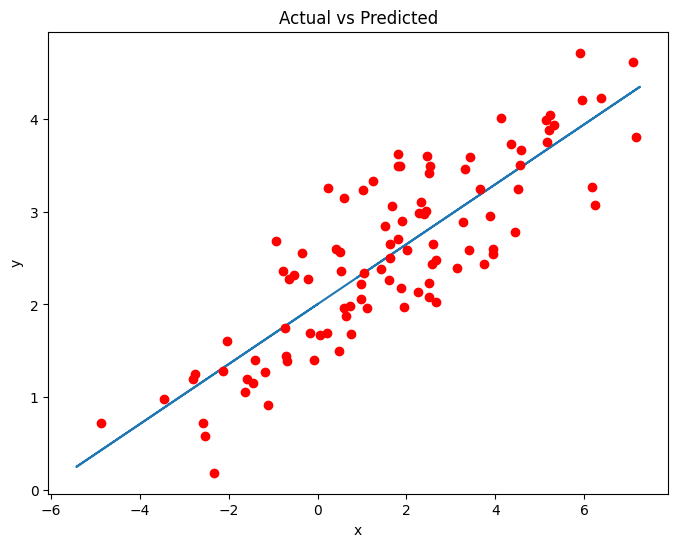

In [4]:
new_x = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
predicted = model.predict(new_x)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercises
### A
Using [Ordinary Least Squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares), attempt to get a regression line that is equal to the one `sklearn` provides.

Assuming that the data is modeled by the following, having $N$ data points available:
$$
\underbrace{\hat{\mathbf{y}}}_{N \times 1} = \underbrace{\mathbf{X}}_{N\times (K+1)} \underbrace{\beta^\text{*}}_{(K+1) \times 1} + \underbrace{\varepsilon}_{N \times 1} 
$$
Ordinary Least squares optimizes the parameters $\beta$ such that the resdiual error (measured by the Sum of Squared Errors (SSE) objective/loss function $L$) is minimal (regression). That is:
$$
L(\mathbf{X}_i, y_i;\mathbf{\beta}) = \sum_{i=1}^N (y_i - \hat{y_i})^2 \\
\beta^\text{*} = \argmin_\beta L(\mathbf{X}, \mathbf{y};\beta)
$$
where $y_i$ is the true value and $\hat{y_i}$ is the predicted value given a point $\mathbf{X}_i \in \mathbb{R}$.
We won't go into detail here how to solve this optimization problem but instead give you the solution directly:
$$
\beta^\text{*} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
$$
Using this, you need to organize your data in matrices of shapes $(N, K+1)$ for $\mathbf{X}$ with $N$ being the number of data points and $K$ being the dimension of $\mathbf{X_i}$, i.e. $\mathbf{X}_i \in \mathbb{R}^K$. The $+1$ is for the intercept, so $\beta_0$ will be our intercept term. For $\mathbf{y}$, you need to make sure it is of shape $(N, 1)$. So, the first row of $\mathbf{X}$ would look like this if $\mathbf{X}_i \in \mathbb{R}$:
$$
\mathbf{X_0} = \begin{bmatrix}1 & x_{1,0}\end{bmatrix}
$$
<details open>
<summary>If the above formulation is too complicated, here's another formulation</summary>
<br>
Assuming
Yₑ = α + β X

![ols.gif](ols.gif "ols")

- β = Cov(X, Y) / Var(X).
- α = mean(Y)-β*mean(X)

</br>
</details>

### B
Extend what we have shown above to 3D predict a plane using Linear regression given a point cloud.

Planes can be plotted with 
```{Python}
x = np.linspace(start, end, n)
y = np.linspace(start, end, n)
xx, yy = np.meshgrid(x_t, y_t)

ax.plot_surface(xx, yy, predicted_zz, alpha=0.2)
```

# Task A

Intercept (α): 2.003
Slope (β): 0.323


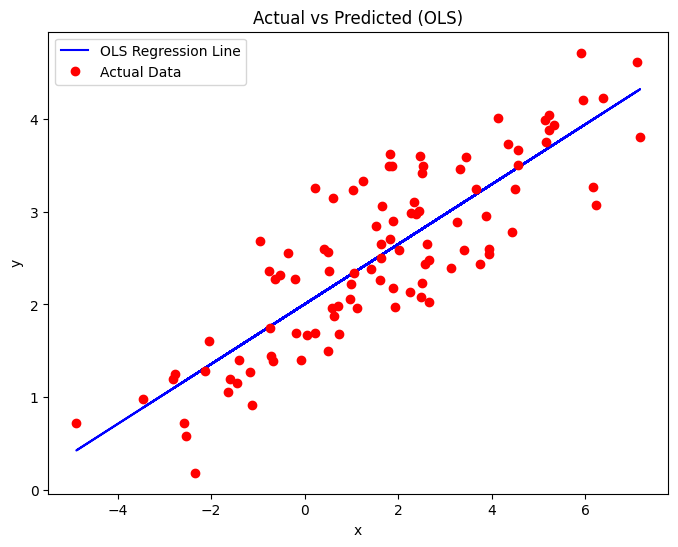

In [7]:
# Step 1: Arrange data in appropriate form
X = np.hstack([np.ones((x_r.shape[0], 1)), x_r])  # Adding column of 1s for intercept
Y = y.reshape(-1, 1)  # Reshape y into column vector

# Step 2: Calculate beta using OLS formula
# β* = (X.T * X)^(-1) * X.T * Y
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ Y

# Extract the intercept and slope
intercept_ols, slope_ols = beta_ols.flatten()
print(f"Intercept (α): {intercept_ols:.3f}")
print(f"Slope (β): {slope_ols:.3f}")

# Predict new values using the calculated β
predicted_ols = X @ beta_ols

# Plot to compare the predictions
plt.figure(figsize=(8, 6))
plt.plot(x, predicted_ols, 'b-', label='OLS Regression Line')  # OLS regression line
plt.plot(x, y, 'ro', label='Actual Data')  # scatter plot showing actual data
plt.title('Actual vs Predicted (OLS)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Task B

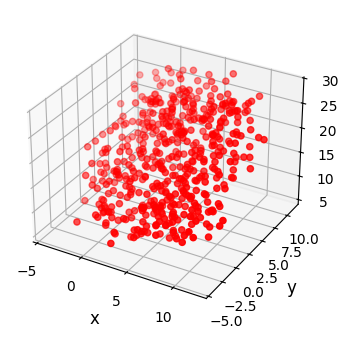

Intercept (β_0): 10.814
Coefficients (β_1, β_2): 0.032, 1.527


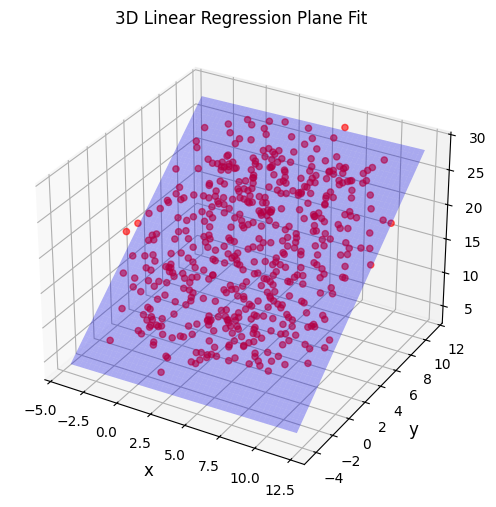

In [8]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load and visualize the point cloud
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)

fig = plt.figure(figsize=(6, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()

# Step 2: Prepare the data for linear regression
# We want to predict z from x and y, so x and y are features and z is target
X = xyz[:, :2]  # x and y as features
Z = xyz[:, 2].reshape(-1, 1)  # z as target

# Step 3: Fit the Linear Regression model
lm_3d = LinearRegression()
lm_3d.fit(X, Z)

# Extract the coefficients
intercept_3d = lm_3d.intercept_[0]
coefficients_3d = lm_3d.coef_[0]
print(f"Intercept (β_0): {intercept_3d:.3f}")
print(f"Coefficients (β_1, β_2): {coefficients_3d[0]:.3f}, {coefficients_3d[1]:.3f}")

# Step 4: Create a meshgrid for plane visualization
x_t = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 50)
y_t = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 50)
xx, yy = np.meshgrid(x_t, y_t)

# Calculate the corresponding z values for the plane
predicted_zz = intercept_3d + coefficients_3d[0] * xx + coefficients_3d[1] * yy

# Step 5: Plot the plane with the original point cloud
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='red', alpha=0.6)
ax.plot_surface(xx, yy, predicted_zz, alpha=0.3, color='blue')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.title("3D Linear Regression Plane Fit")
plt.show()
